In [1]:
import torch
import models
import logging
import utils
import data
import matplotlib.pyplot as plt
from os.path import join

from importlib import reload
reload(models)
reload(utils)
reload(data)

logger = logging.getLogger()

# MAYBE THE PROBLEM IS THE PREDICTION NETWORK i.e. the UNET (I used a different implementation) --> time vs position encoding!?

In [25]:
sweep_dir = "experiments"
exp = "third_try"
config_file = join(sweep_dir, exp, "config.yaml")
dsb = models.CachedDSB.from_config(config_file, logger)
n = 17
M = 3

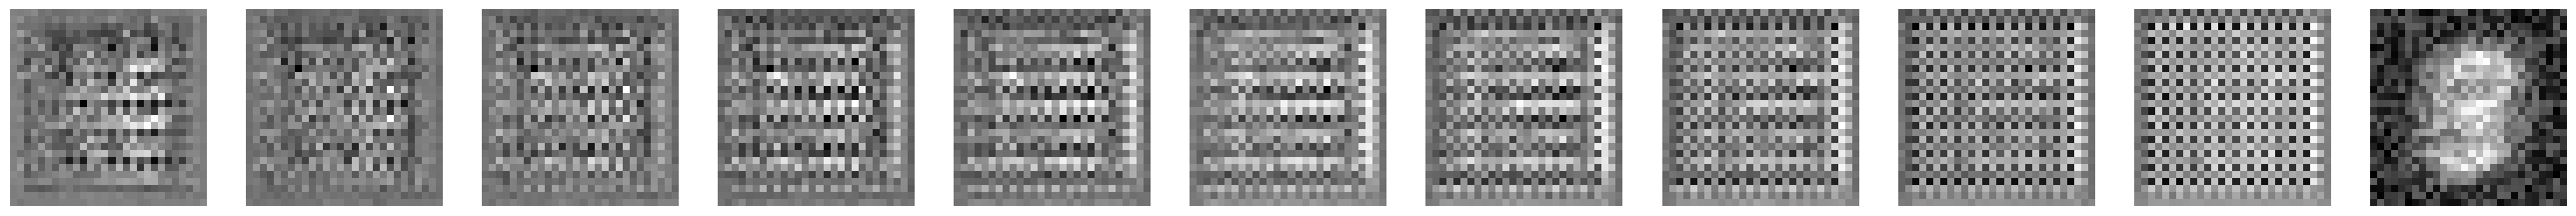

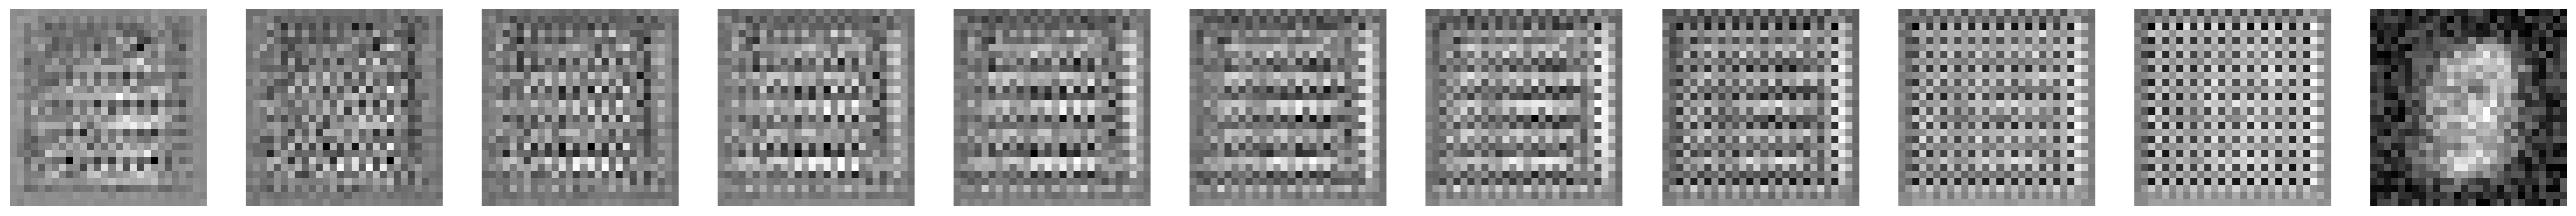

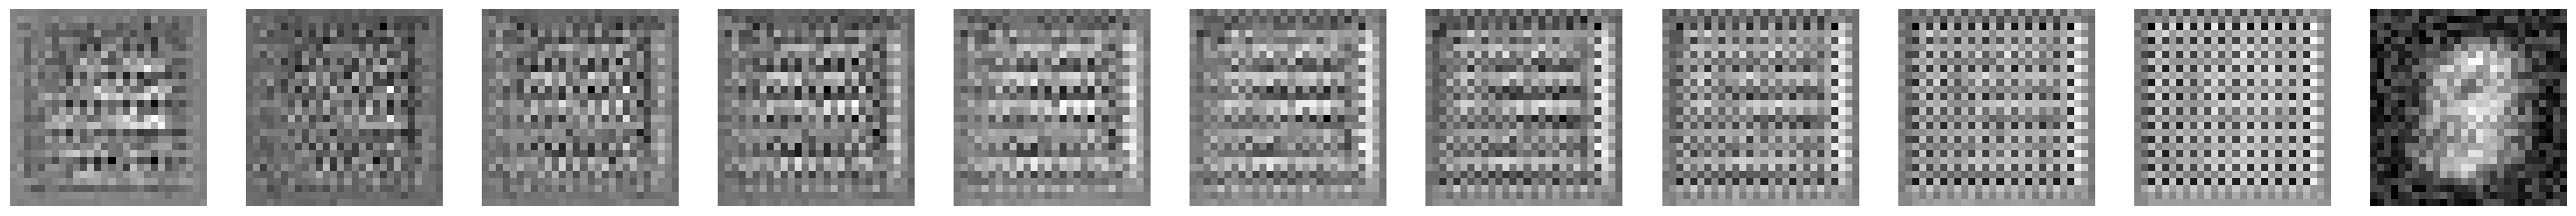

In [27]:
# backward
dsb.load_model('beta', n, ema=False)
X = dsb.generate_path('alpha', M=M, remove_last_noise=True)
X = X.cpu()

for i in range(M):
    utils.plot_image(X[:,i])

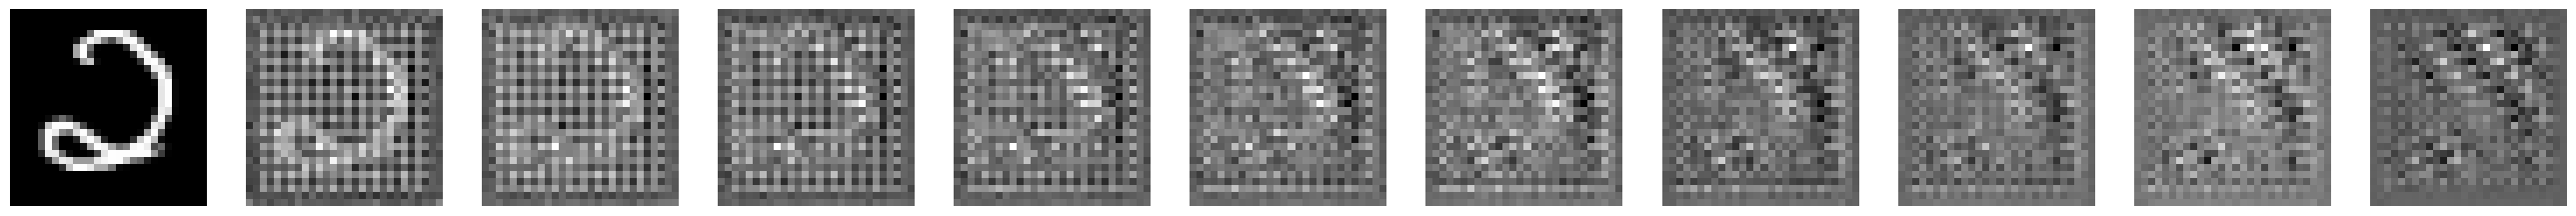

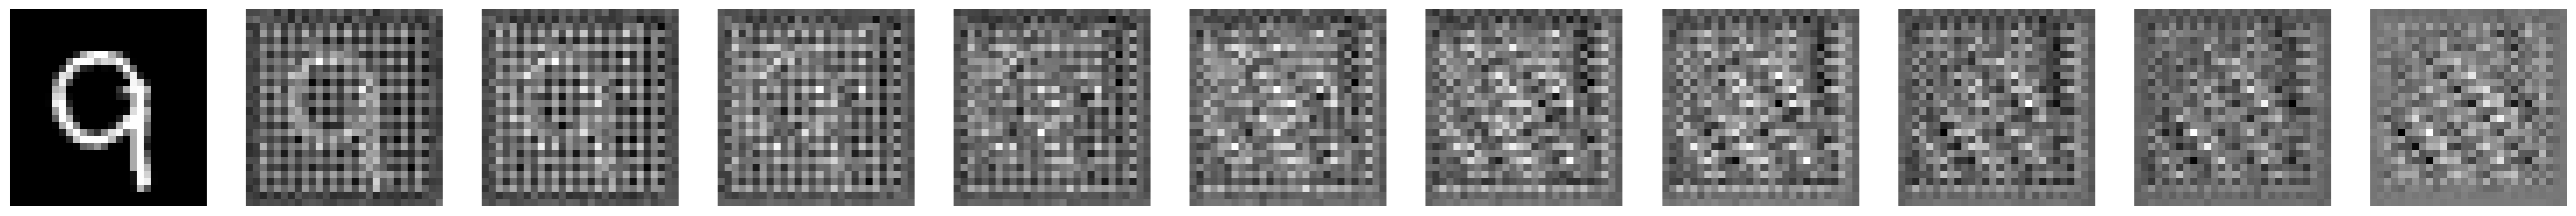

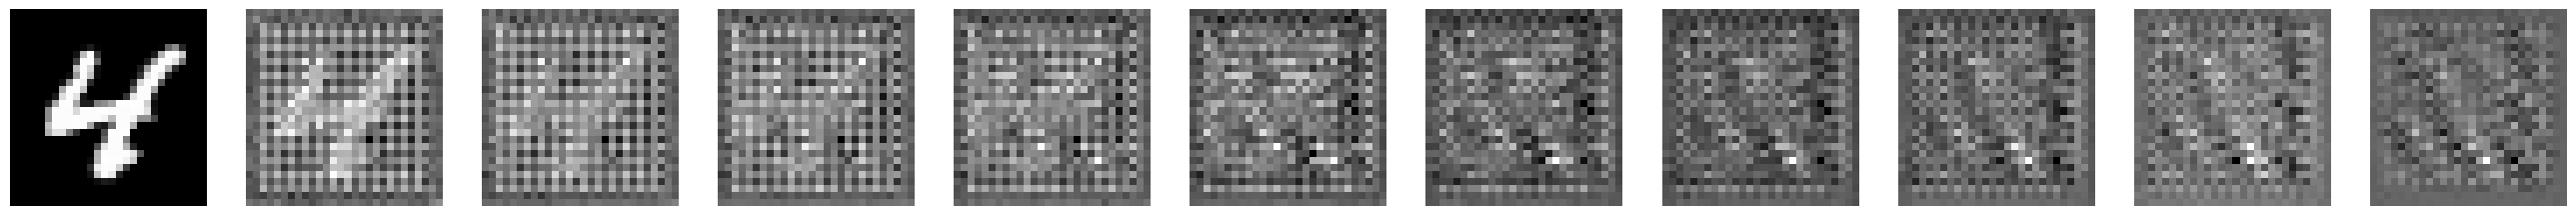

In [28]:
# forward
dsb.load_model('alpha', n, ema=False)
X = dsb.generate_path('beta', M=M, remove_last_noise=False)
X = X.cpu()

for i in range(M):
    utils.plot_image(X[:,i])